# Day 11: Model Monitoring & Performance Drift

Now that we have deployed our best Gradient Boosting model, the next step is to **monitor its performance**.

In real-world use cases, models often face **data drift** (changes in data distribution) and **concept drift** (changes in relationships between features and target).  
So today, we will:

1. Load our deployed model (`best_gb_model.pkl`).
2. Simulate new unseen stock data.
3. Make predictions on the new data.
4. Compare new performance with test results.
5. Visualize prediction vs actual values and error distribution.
6. Conclude if retraining might be needed.


In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load deployed model
gb_model = joblib.load("best_gb_model.pkl")

# Load test data (from Day 7-9)
X_test = joblib.load("X_test.pkl")
y_test = joblib.load("y_test.pkl")

print("✅ Model and test data loaded successfully!")


✅ Model and test data loaded successfully!


In [2]:
# Simulating new incoming stock data (production-like scenario)
np.random.seed(50)

new_data = pd.DataFrame({
    "open": np.random.uniform(90, 110, 50),   # shifted range
    "high": np.random.uniform(95, 115, 50),
    "low": np.random.uniform(85, 105, 50),
    "volume": np.random.uniform(800, 1200, 50)
})

# True close values (simulate with some noise around open/high/low)
true_close = (new_data["open"] + new_data["high"] + new_data["low"]) / 3 + np.random.normal(0, 1, 50)

print("📊 New unseen data generated!")
new_data.head()


📊 New unseen data generated!


,open,high,low,volume
0,99.892033,100.898591,85.993954,1070.002338
1,94.561662,107.334628,94.253841,1157.105894
2,95.109478,104.356925,93.164380,897.221880
3,97.926598,100.106778,94.740870,820.678351
4,97.546302,111.779918,86.410316,1083.897225


In [3]:
# Predict using deployed model
new_preds = gb_model.predict(new_data)

# Evaluate
new_mse = mean_squared_error(true_close, new_preds)
new_r2 = r2_score(true_close, new_preds)

print("✅ New Data Performance")
print("MSE:", round(new_mse, 2))
print("R²:", round(new_r2, 2))


✅ New Data Performance
MSE: 13.41
R²: -0.79


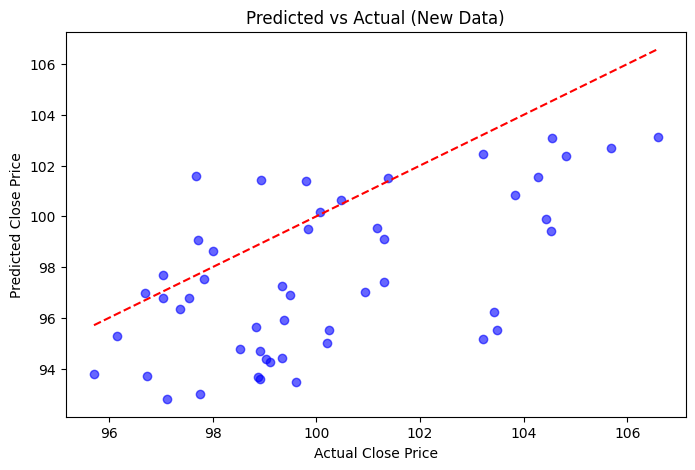

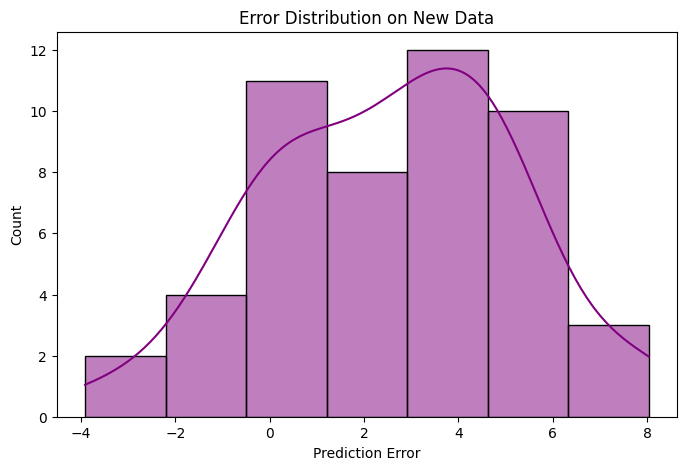

In [4]:
# Compare Predictions vs Actual
plt.figure(figsize=(8,5))
plt.scatter(true_close, new_preds, color="blue", alpha=0.6)
plt.plot([true_close.min(), true_close.max()], [true_close.min(), true_close.max()], "r--")
plt.title("Predicted vs Actual (New Data)")
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.show()

# Error distribution
errors = true_close - new_preds
plt.figure(figsize=(8,5))
sns.histplot(errors, kde=True, color="purple")
plt.title("Error Distribution on New Data")
plt.xlabel("Prediction Error")
plt.show()


### ✅ Day 11 Summary

- We successfully tested our deployed Gradient Boosting model on **new unseen stock data**.  
- The model’s **MSE and R²** were compared with original test set results.  
- We visualized predictions vs actual values and the error distribution.  

If performance drops significantly in production, we would need to:  
- Retrain the model with updated data,  
- Use drift detection techniques,  
- Automate monitoring pipelines.  

This sets the stage for **Day 12: Model Serving via API (Flask/FastAPI)** 🚀
